<a href="https://colab.research.google.com/github/SamanZargarzadeh/Automatic-Image-Tagging-for-Fashion-E-commerce/blob/main/MNIST_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion Image tagging with MNIST Dataset

In [1]:
from google.colab import drive
drive.mount('gdrive')

Mounted at gdrive


# 1) Import 

In [2]:
import tensorflow as tf

In [3]:
# check the version
tf.__version__

'2.12.0'

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout 
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.preprocessing import image
from keras.regularizers import l2
from keras.optimizers import Adam

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 2) Load Data

In [6]:
fashion_mnist_data = tf.keras.datasets.fashion_mnist
(X_CV_train, y_CV_train), (X_test, y_test) = fashion_mnist_data.load_data()

from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X_CV_train, y_CV_train,test_size=(1000/6000),train_size=(5000/6000))



4422102/4422102 [==============================] - 1s 0us/step


In [7]:
print("train X shape: ", X_train.shape) 
print("train y shape: ", y_train.shape) 
print("CV X shape: ", X_cv.shape) 
print("CV y shape: ", y_cv.shape) 
print("test X shape: ", X_test.shape)   
print("test y shape: ", y_test.shape)   

train X shape:  (50000, 28, 28)
train y shape:  (50000,)
CV X shape:  (10000, 28, 28)
CV y shape:  (10000,)
test X shape:  (10000, 28, 28)
test y shape:  (10000,)


In [10]:
# Define the labels

labels = [
    'T-shirt/top', # 0
    'Trouser',     # 1
    'Pullover',    # 2
    'Dress',       # 3
    'Coat',        # 4
    'Sandal',      # 5
    'Shirt',       # 6
    'Sneaker',     # 7
    'Bag',         # 8
    'Ankle boot'   # 9
]

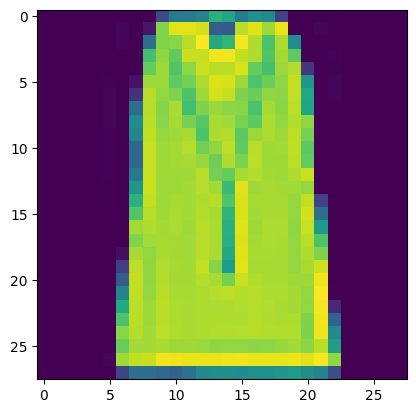

label: Shirt


In [11]:
# Display one of the images

i = 1
img = X_train[i, : , :]
plt.imshow(img)
plt.show()
print(f"label: {labels[y_train[i]]}")

In [12]:
# display y label
y_train[i]

6

In [13]:
# Rescale the image values so that they lie in between 0 and 1.

X_train = X_train / 255.
X_test = X_test / 255.
X_cv = X_cv / 255.
X_train.shape

(50000, 28, 28)

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_cv = X_cv.reshape(X_cv.shape[0], -1)


In [15]:
X_train.shape

(50000, 784)

In [16]:
y_train.shape

(50000,)

In [17]:
unique_values = np.unique(y_test)
counts = np.bincount(y_test)

# Iterate over the unique values and print their corresponding counts
for value in unique_values:
    count = counts[value]
    print(f"Count of {value}: {count}")


Count of 0: 1000
Count of 1: 1000
Count of 2: 1000
Count of 3: 1000
Count of 4: 1000
Count of 5: 1000
Count of 6: 1000
Count of 7: 1000
Count of 8: 1000
Count of 9: 1000


In [18]:
# Filter data for values Dress and Shirt
filter_indices = np.logical_or(y_train == 2, y_train == 4)
filtered_X_train = X_train[filter_indices]
filtered_y = y_train[filter_indices]
filtered_y_train = np.where(filtered_y == 2, 1, np.where(filtered_y == 4, 0, filtered_y))

print(filtered_y_train.shape)
print(filtered_X_train.shape)

(9993,)
(9993, 784)


In [19]:
filter_indices = np.logical_or(y_test == 2, y_test == 4)
filtered_X_test = X_test[filter_indices]
filtered_y = y_test[filter_indices]
filtered_y_test = np.where(filtered_y == 2, 1, np.where(filtered_y == 4, 0, filtered_y))

print(filtered_y_test.shape)
print(filtered_X_test.shape)


(2000,)
(2000, 784)


In [20]:
filter_indices = np.logical_or(y_cv == 2, y_cv == 4)
filtered_X_cv = X_cv[filter_indices]
filtered_y = y_cv[filter_indices]
filtered_y_cv = np.where(filtered_y == 2, 1, np.where(filtered_y == 4, 0, filtered_y))

print(filtered_y_cv.shape)
print(filtered_X_cv.shape)

(2007,)
(2007, 784)


In [37]:
# Best (0.0013, 31)
n_1=13
alpha= 0.0742
learning_rate = alpha 
lambd=0
epochs=10

In [38]:
train_set_x = filtered_X_train
test_set_x = filtered_X_test
cv_set_x = filtered_X_cv

train_set_y = filtered_y_train
test_set_y = filtered_y_test
cv_set_y = filtered_y_cv

In [40]:
modelD = Sequential()
modelD.add(Dense(n_1, activation='relu', input_shape=(784,), kernel_regularizer=l2(lambd)))
modelD.add(Dense(4, activation='relu', kernel_regularizer=l2(lambd)))
modelD.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(lambd)))

optimizer = Adam(learning_rate=learning_rate)

modelD.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
historyD = modelD.fit(train_set_x, train_set_y , epochs=epochs)
pd.DataFrame(historyD.history).head()

Epoch 1/10
313/313 [==============================] - 1s 2ms/step - loss: 0.7067 - accuracy: 0.4992
Epoch 2/10
313/313 [==============================] - 1s 3ms/step - loss: 0.6946 - accuracy: 0.4996
Epoch 3/10
313/313 [==============================] - 1s 3ms/step - loss: 0.6953 - accuracy: 0.4936
Epoch 4/10
313/313 [==============================] - 1s 3ms/step - loss: 0.6958 - accuracy: 0.4976
Epoch 5/10
313/313 [==============================] - 1s 3ms/step - loss: 0.6939 - accuracy: 0.5087
Epoch 6/10
313/313 [==============================] - 1s 3ms/step - loss: 0.6947 - accuracy: 0.4949
Epoch 7/10
313/313 [==============================] - 1s 3ms/step - loss: 0.6951 - accuracy: 0.4981
Epoch 8/10
313/313 [==============================] - 1s 2ms/step - loss: 0.6940 - accuracy: 0.5071
Epoch 9/10
313/313 [==============================] - 1s 2ms/step - loss: 0.6960 - accuracy: 0.4987
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.6942 - accuracy: 0.5027

,loss,accuracy
0,0.706707,0.499249
1,0.694629,0.499650
2,0.695338,0.493646
3,0.695782,0.497648
4,0.693935,0.508656


[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Loss')]

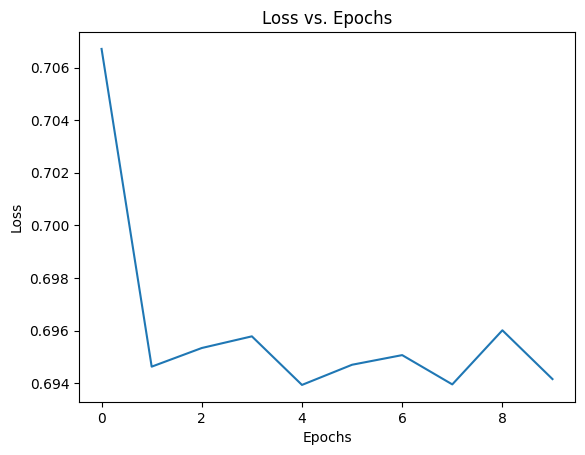

In [41]:
loss_plot = pd.DataFrame(historyD.history).plot(y="loss", title = "Loss vs. Epochs", legend=False)
loss_plot.set(xlabel="Epochs", ylabel="Loss")

In [42]:
test_loss, test_accuracy = modelD.evaluate(test_set_x, test_set_y)

63/63 [==============================] - 0s 2ms/step - loss: 0.6998 - accuracy: 0.5000


In [43]:
cv_loss, cv_accuracy = modelD.evaluate(cv_set_x, cv_set_y)

63/63 [==============================] - 0s 2ms/step - loss: 0.7017 - accuracy: 0.4918


In [ ]:
# Save the arrays
np.save('/content/gdrive/MyDrive/MNIST/train_set_x.npy', filtered_X_train)
np.save('/content/gdrive/MyDrive/MNIST/test_set_x.npy', filtered_X_test)
np.save('/content/gdrive/MyDrive/MNIST/cv_set_x.npy', filtered_X_cv)
np.save('/content/gdrive/MyDrive/MNIST/train_set_y.npy', filtered_y_train)
np.save('/content/gdrive/MyDrive/MNIST/test_set_y.npy', filtered_y_test)
np.save('/content/gdrive/MyDrive/MNIST/cv_set_y.npy', filtered_y_cv)

# 3) Build Model (Sequential)

Here, we build a NN model (feed forward) with one or more hidden layers. 

## Examples

In [ ]:
# example 1

# building a NN model 
# the input layer with 16 units
# one hidden layer, with 64 units, with a relu activation function.
# the output layer is binary with a sigmoid activation function.

model1 = Sequential([
                    Dense(64, activation = 'relu', input_shape = (16,)),
                    Dense(1, activation = 'sigmoid')
])

Note: If you don't specify the activation function, it will be linear.

Read more about other activation choices here: https://www.tensorflow.org/api_docs/python/tf/keras/activations

Let's take a look at the model we just bulit:

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1088      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


We can also take a look at the value of initial weights and biases:

In [ ]:
model1.weights

[<tf.Variable 'dense/kernel:0' shape=(16, 64) dtype=float32, numpy=
 array([[-0.12466884, -0.24165632,  0.13704988, ..., -0.00126263,
          0.06674117, -0.14089835],
        [ 0.23649347, -0.0589924 ,  0.21053007, ...,  0.2612546 ,
          0.23661548,  0.06963128],
        [-0.08440943,  0.11977646,  0.07764724, ..., -0.06793207,
          0.14893788, -0.21901138],
        ...,
        [ 0.1647161 ,  0.08467898,  0.09657091, ..., -0.08145811,
         -0.24726008,  0.26563728],
        [ 0.07477048,  0.07436335,  0.06656906, ..., -0.08300105,
          0.17016926,  0.02781704],
        [-0.17714864,  0.05200911,  0.00885028, ...,  0.19939327,
          0.03654894, -0.1750934 ]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(64,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

An alternative way to build sequential models:

In [ ]:
# example 1 - alternative method:

# building a NN model 
# the input layer with 16 units
# one hidden layer, with 64 units, with a relu activation function.
# the output layer is binary with a sigmoid activation function.

model1 = Sequential()
model1.add(Dense(64, activation = 'relu', input_shape = (16,)))
model1.add(Dense(1, activation = 'sigmoid'))

# model.add append additional layers to the model

In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                1088      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


More examples:

In [ ]:
# example 2

# building a NN model 
# the input layer with 16 units
# one hidden layer, with 32 units, with a relu activation function.
# the output layer is multi-class with 10 classes (activation function is softmax).

model2 = Sequential([
                    Dense(32, activation = 'relu', input_shape = (16,)),
                    Dense(10, activation = 'softmax')
])

In [ ]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                544       
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 874
Trainable params: 874
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# example 3

# building a NN model 
# the input layer with 16 units
# first hidden layer, with 32 units, with a relu activation function.
# second hidden layer, with 8 units, with a relu activation function.
# the output layer is binary with a sigmoid activation function.

model3 = Sequential([
                    Dense(32, activation = 'relu', input_shape = (16,)),
                    Dense(8, activation = 'relu'),
                    Dense(1, activation = 'sigmoid')
])

In [ ]:
model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                544       
                                                                 
 dense_9 (Dense)             (None, 8)                 264       
                                                                 
 dense_10 (Dense)            (None, 1)                 9         
                                                                 
Total params: 817
Trainable params: 817
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# example 4

# building a NN model
# the input layer with 16 units
# no hidden layers
# the output layer is binary with a sigmoid activation function.

model4 = Sequential([
                    Dense(1, activation = 'sigmoid', input_shape = (16,))
])

In [ ]:
model4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


If the input shape is two-dimensional, we can flatten it and unroll it into a long one-dimensional vector first:

In [ ]:
# example 5:

# building a NN model 
# the input layer with input_shape (4, 4)
# one hidden layer, with 64 units, with a relu activation function.
# the output layer is binary with a sigmoid activation function.

model5 = Sequential([
                    Flatten(input_shape = (4, 4)), #(16,)
                    Dense(64, activation = 'relu'),
                    Dense(1, activation = 'sigmoid')
])

In [ ]:
model5.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 16)                0         
                                                                 
 dense_12 (Dense)            (None, 64)                1088      
                                                                 
 dense_13 (Dense)            (None, 1)                 65        
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


We can define a name for each layer:

In [ ]:
# example 5 - define names for each layer:

# building a NN model 
# the input layer with input_shape (4, 4)
# one hidden layer, with 64 units, with a relu activation function.
# the output layer is binary with a sigmoid activation function.

model5 = Sequential([
                    Flatten(input_shape = (4, 4), name = 'layer_0'), 
                    Dense(64, activation = 'relu', name = 'layer_1'),
                    Dense(1, activation = 'sigmoid', name = 'layer_2')
])

In [ ]:
model5.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_0 (Flatten)           (None, 16)                0         
                                                                 
 layer_1 (Dense)             (None, 64)                1088      
                                                                 
 layer_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


## For our dataset

In [ ]:
# build the model

# the input layer with input_shape (28, 28)
# one hidden layer, with 64 units, with a relu activation function.
# the output layer is multi-class with 10 classes (activation function is softmax).

model = Sequential([
                    Flatten(input_shape = (28, 28)),
                    Dense(64, activation = 'relu'),
                    Dense(10, activation = 'softmax')
])

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 64)                50240     
                                                                 
 dense_15 (Dense)            (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


# 4) Start Training (Compile)

To start training our network on data, we need to define the optimization algorithm, and a loss function that will give us a measure of our model's performance. Also we define a set of metrics that we want to keep track of as the model is training. These metrics will be calculated for each epoch of training along with the evaluation of the loss function on the training data.

## Examples

In [ ]:
# example 1:
model1 = Sequential([
                    Dense(64, activation = 'relu', input_shape = (16,)),
                    Dense(1, activation = 'sigmoid')
])

model1.compile(
    optimizer = 'adam',  
    loss = 'binary_crossentropy', 
    metrics = ['binary_accuracy'] 
)

Read more about other optimizer choices here: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/

Read more about other loss choices here: https://www.tensorflow.org/api_docs/python/tf/keras/losses

Read more about other metrics choices here: https://www.tensorflow.org/api_docs/python/tf/keras/metrics

Each of the strings in the code above is a reference to another object or function and we can always use that object or function directly:

In [ ]:
# example 1 - alternative compile method:

model1.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = [tf.keras.metrics.BinaryAccuracy()]
)

The reason why you might want to use the code above is because it gives you greater flexibility as many of these objects and functions themselves have options that you might want to have control over.

In [ ]:
# example 1 - we can change the default parameters

model1.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.003, beta_1=0.9, beta_2=0.999, epsilon=1e-07), # the default values.
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),          # use sigmoid activation, if in the final hidden layer, we do not specify an activation function or define a linear one.
    metrics = [tf.keras.metrics.BinaryAccuracy(threshold=0.5)]            # default is 0.5 (the threshold for predictions to be classed as positive).
)

More examples:

In [ ]:
# example 2

# building a NN model 
# the input layer with 16 units
# one hidden layer, with 64 units, with a relu activation function.
# the output layer is multi-class with 10 classes (activation function is softmax).

model2 = Sequential([
                    Dense(64, activation = 'relu', input_shape = (16,)),
                    Dense(10, activation = 'softmax')
])

model2.compile(
    optimizer = 'rmsprop', 
    loss = 'categorical_crossentropy', 
    metrics = ['categorical_accuracy', 'mae']
)

## For our dataset

In [ ]:
# for our data set:

model = Sequential([
                    Flatten(input_shape = (28, 28)),
                    Dense(64, activation = 'relu'),
                    Dense(10, activation = 'softmax')
])


model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.005),
    loss = 'sparse_categorical_crossentropy', # Use this loss function when the y labels are integers. 
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] # Use this accuracy when the y labels are integers.
)

In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 64)                50240     
                                                                 
 dense_21 (Dense)            (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


An alternative compile method:

In [ ]:
# for our data set - alternative compile method:

opt = tf.keras.optimizers.Adam(learning_rate = 0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(
    optimizer = opt,
    loss = 'sparse_categorical_crossentropy', 
    metrics = [acc]
)

# 5) Model Fit

Calling model.fit returns a TensorFlow history object. This object contains a record of the progress of the network during training in terms of the loss and the metrics that we defined when we compiled the model.

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
# 1 epoch = (for 235 mini-batch) *(256 images in each mini batch)

In [ ]:
# fit the model

history = model.fit(X_train, y_train, epochs = 8, batch_size = 256, verbose = 2)
# epochs = 8: training will make 8 complete passes through the dataset.
# batch_size = 256: By default, the batch size is set to 32.
# verbose = 2: print only one line per epoch
# verbose = 1 (or True): print everything (the defalut)
# verbose = 0 (or False): silence the print out

Epoch 1/8
235/235 - 1s - loss: 0.5743 - sparse_categorical_accuracy: 0.8002 - 1s/epoch - 6ms/step
Epoch 2/8
235/235 - 1s - loss: 0.4122 - sparse_categorical_accuracy: 0.8533 - 791ms/epoch - 3ms/step
Epoch 3/8
235/235 - 1s - loss: 0.3708 - sparse_categorical_accuracy: 0.8672 - 733ms/epoch - 3ms/step
Epoch 4/8
235/235 - 1s - loss: 0.3502 - sparse_categorical_accuracy: 0.8733 - 716ms/epoch - 3ms/step
Epoch 5/8
235/235 - 1s - loss: 0.3273 - sparse_categorical_accuracy: 0.8809 - 722ms/epoch - 3ms/step
Epoch 6/8
235/235 - 1s - loss: 0.3155 - sparse_categorical_accuracy: 0.8853 - 717ms/epoch - 3ms/step
Epoch 7/8
235/235 - 1s - loss: 0.3054 - sparse_categorical_accuracy: 0.8889 - 729ms/epoch - 3ms/step
Epoch 8/8
235/235 - 1s - loss: 0.2943 - sparse_categorical_accuracy: 0.8909 - 741ms/epoch - 3ms/step


The object history has an attribute called history that is a dictionary and contains information about the loss functions and matrix after each of the epochs.

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'sparse_categorical_accuracy'])


Let's plot the training history:

In [ ]:
# Load the history into a pandas Dataframe

df = pd.DataFrame(history.history)
df.head()

,loss,sparse_categorical_accuracy
0,0.574292,0.800183
1,0.412179,0.853267
2,0.370774,0.867233
3,0.350183,0.873250
4,0.327317,0.880850


[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Loss')]

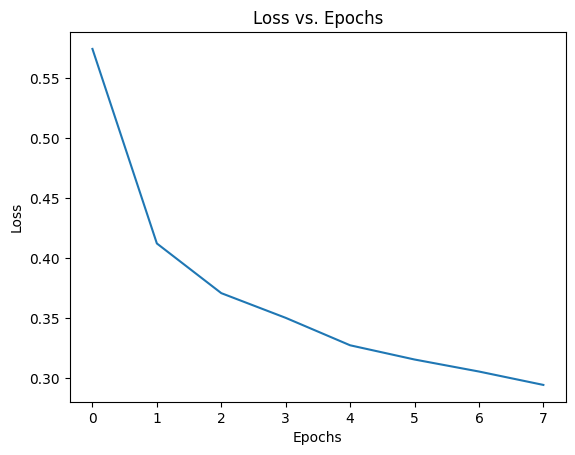

In [ ]:
# Make a plot for the loss

loss_plot = df.plot(y="loss", title = "Loss vs. Epochs", legend=False)
loss_plot.set(xlabel="Epochs", ylabel="Loss")

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'sparse_categorical_accuracy')]

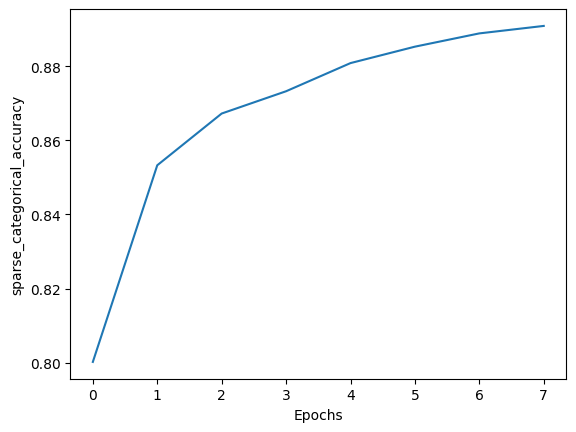

In [ ]:
# Make a plot for the accuracy

accuracy_plot = df.plot(y="sparse_categorical_accuracy", legend=False)
accuracy_plot.set(xlabel="Epochs", ylabel="sparse_categorical_accuracy")

# 6) Model Evaluate on Test

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3840 - sparse_categorical_accuracy: 0.8624


# 7) Model Predict

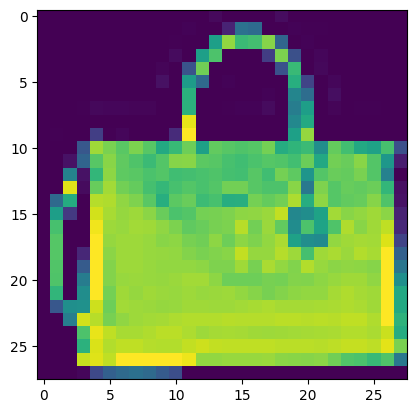

Label: Bag


In [ ]:
# Choose a random test image

random_inx = np.random.choice(X_test.shape[0])
random_inx = 30
X_sample = X_test[random_inx]
plt.imshow(X_sample)
plt.show()
print(f"Label: {labels[y_test[random_inx]]}")

In [ ]:
X_sample.shape

(28, 28)

In [ ]:
# need to reshape X_sample

X_sample = X_sample.reshape(1, 28, 28) # X_sample: (num_samples, X_sample.shape)
X_sample.shape

(1, 28, 28)

In [ ]:
# Get the model predictions

model.predict(X_sample)

1/1 [==============================] - 0s 80ms/step


array([[4.6767288e-11, 2.3313402e-11, 1.0554427e-12, 2.7027158e-11,
        1.6424865e-09, 2.5218633e-10, 1.0413023e-11, 1.2716427e-10,
        1.0000000e+00, 2.5757743e-18]], dtype=float32)

In [ ]:
predictions = model.predict(X_sample)
print(np.argmax(predictions))
print(f"Model prediction:{labels[np.argmax(predictions)]}")

1/1 [==============================] - 0s 21ms/step
8
Model prediction:Bag


# 8) Model Fit with Validation Sets

Sometimes, datasets have already been packaged up for us with the training and test split:

In [ ]:
# Recall:
# fashion_mnist_data = tf.keras.datasets.fashion_mnist
# (X_train, y_train), (X_test, y_test) = fashion_mnist_data.load_data()

In [ ]:
# Recall:
# build model - nothing changed

model = Sequential([
                    Flatten(input_shape = (28, 28)),
                    Dense(64, activation = 'relu'),
                    Dense(10, activation = 'softmax')
])

In [ ]:
# Recall:
# Start Training - nothing changed

model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.005),
    loss = 'sparse_categorical_crossentropy', # Use this loss function when the y labels are integers. 
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] # Use this accuracy when the y labels are integers.
)

In [ ]:
# fit the model with validation set

history = model.fit(X_train, y_train, epochs = 25, batch_size = 256, verbose = False, validation_split=0.2) 
# The 0.2 means that 20 percent of the training data will be held back for validation.

The model's performance is recorded on both the training and validation sets.

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])


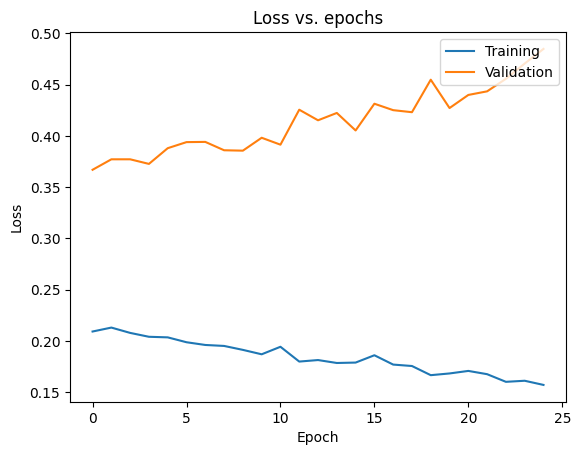

In [ ]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

From the graph, we can see that the model has vastly overfit the training data and so it underperforms on the validation data.

In [ ]:
# Testing mode

test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.5153 - sparse_categorical_accuracy: 0.8687


Practice Question) See if you can reduce overfitting by, for example, altering the number of epochs at the model trains for or changing the layer structure of the model.

# 9) Reduce Overfit - Change the NN Model

In [ ]:
# build model

model = Sequential([
                    Flatten(input_shape = (28, 28)),
                    Dense(16, activation = 'relu'),
                    Dense(10, activation = 'softmax')
])

In [ ]:
# Start Training 

model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.005),
    loss = 'sparse_categorical_crossentropy', # Use this loss function when the y labels are integers. 
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] # Use this accuracy when the y labels are integers.
)

In [ ]:
# fit the model with validation set

history = model.fit(X_train, y_train, epochs = 25, batch_size = 256, verbose = False, validation_split=0.2) 

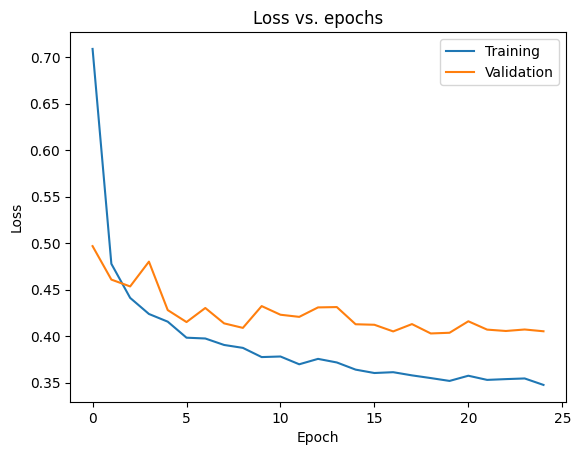

In [ ]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

# 10) Reduce Overfit - L2 Regularization

Model Regularization

In [ ]:
# build model - we should change this!

model = Sequential([
                   Flatten(input_shape = (28, 28)),
                   Dense(64, activation = 'relu'),
                   Dense(10, activation = 'softmax')
])

In [ ]:
#l2 regularizer
model = Sequential([
                    Flatten(input_shape = (28, 28)),
                    Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)), # penalty rate (or lambda) =0.001
                    Dense(10, activation = 'softmax', kernel_regularizer=tf.keras.regularizers.l2(0.001))
])

# the weight matrix is sometimes called the kernel.

In [ ]:
# Start Training  - nothing changed here!

model.compile(
     optimizer = tf.keras.optimizers.Adam(learning_rate = 0.005),
     loss = 'sparse_categorical_crossentropy', # Use this loss function when the y labels are integers. 
     metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] # Use this accuracy when the y labels are integers.
 )

In [ ]:
# fit the model with validation set  - nothing changed here!

history = model.fit(X_train, y_train, epochs = 25, batch_size = 256, verbose = False, validation_split=0.2) 
# The 0.2 means that 20 percent of the training data will be held back for validation.

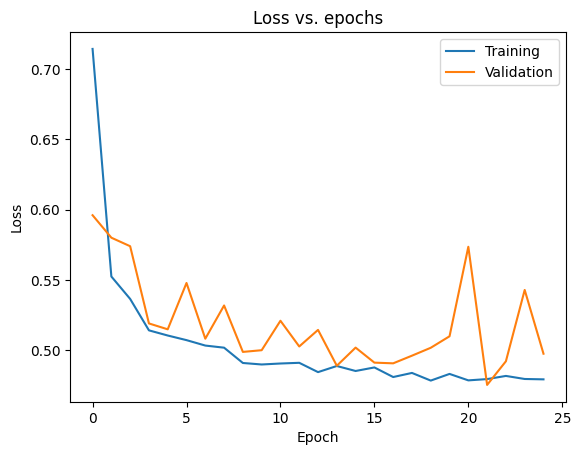

In [ ]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [ ]:
# Testing mode

test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.5167 - sparse_categorical_accuracy: 0.8488


# 11) Reduce Overfit - Dropout Regularization

In [ ]:
# Recall:

#model = Sequential([
#                   Flatten(input_shape = (28, 28)),
#                   Dense(64, activation = 'relu'),
#                   Dense(10, activation = 'softmax')
#])

In [ ]:
#dropout regularizer
#dropout rate = 1-keep_probability

model = Sequential([
                    Flatten(input_shape = (28, 28)),
                    Dense(64, activation='relu'),
                    Dropout(0.5), #dropout rate 
                    Dense(10, activation = 'softmax')
])
                    

In [ ]:
# Start Training - nothing changed here!

model.compile(
     optimizer = tf.keras.optimizers.Adam(learning_rate = 0.005),
     loss = 'sparse_categorical_crossentropy', # Use this loss function when the y labels are integers. 
     metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] # Use this accuracy when the y labels are integers.
 )

In [ ]:
# fit the model with validation set  - nothing changed here!

history = model.fit(X_train, y_train, epochs = 25, batch_size = 256, verbose = False, validation_split=0.2) 
# The 0.2 means that 20 percent of the training data will be held back for validation.

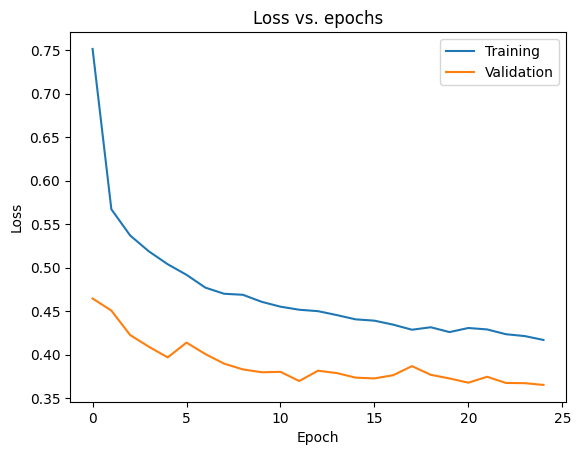

In [ ]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [ ]:
# Testing mode, no dropout

test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3947 - sparse_categorical_accuracy: 0.8613


# 12) Reduce Overfit - Early Stopping 

Another regularization approach is called early stopping. 
Early stopping is a technique that monitors the performance of the network for every epoch on a held out validation set during the training run, and terminates the training conditional on the validation performance.

In [ ]:
# build the original model without L2 or dropout regularization
model = Sequential([
                   Flatten(input_shape = (28, 28)),
                   Dense(64, activation = 'relu'),
                   Dense(10, activation = 'softmax')
])

In [ ]:
# Start Training - nothing changed here!

model.compile(
     optimizer = tf.keras.optimizers.Adam(learning_rate = 0.005),
     loss = 'sparse_categorical_crossentropy', # Use this loss function when the y labels are integers. 
     metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] # Use this accuracy when the y labels are integers.
 )

In [ ]:
#set early stopping

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.01, patience=5) 

# by default, monitor='val_loss', which means that we use the validation loss as the performance measure to decide when to terminate the training.
# we could instead use 'val_accuracy'.

# min_delta: Minimum change in the monitored quantity to qualify as an improvement, 
# i.e. an absolute change of less than min_delta, will count as no improvement.
# by default, min_delta=0.

#patience: Number of consecutive epochs with no improvement after which training will be stopped.
# by default, patience is set to zero which terminates training as soon as the performance measure gets worse from one epoch to the next.

In [ ]:
# fit the model with validation set  

history = model.fit(X_train, y_train, epochs = 25, batch_size = 256, verbose = 2, validation_split=0.2,
                    callbacks=[early_stopping]) 
# The 0.2 means that 20 percent of the training data will be held back for validation.

Epoch 1/25
188/188 - 2s - loss: 0.4201 - sparse_categorical_accuracy: 0.8425 - val_loss: 0.3711 - val_sparse_categorical_accuracy: 0.8664 - 2s/epoch - 8ms/step
Epoch 2/25
188/188 - 1s - loss: 0.4159 - sparse_categorical_accuracy: 0.8424 - val_loss: 0.3754 - val_sparse_categorical_accuracy: 0.8686 - 819ms/epoch - 4ms/step
Epoch 3/25
188/188 - 1s - loss: 0.4159 - sparse_categorical_accuracy: 0.8445 - val_loss: 0.3832 - val_sparse_categorical_accuracy: 0.8625 - 817ms/epoch - 4ms/step
Epoch 4/25
188/188 - 1s - loss: 0.4135 - sparse_categorical_accuracy: 0.8433 - val_loss: 0.3725 - val_sparse_categorical_accuracy: 0.8709 - 992ms/epoch - 5ms/step
Epoch 5/25
188/188 - 1s - loss: 0.4113 - sparse_categorical_accuracy: 0.8448 - val_loss: 0.3739 - val_sparse_categorical_accuracy: 0.8689 - 1s/epoch - 7ms/step
Epoch 6/25
188/188 - 1s - loss: 0.4077 - sparse_categorical_accuracy: 0.8461 - val_loss: 0.3900 - val_sparse_categorical_accuracy: 0.8674 - 1s/epoch - 8ms/step


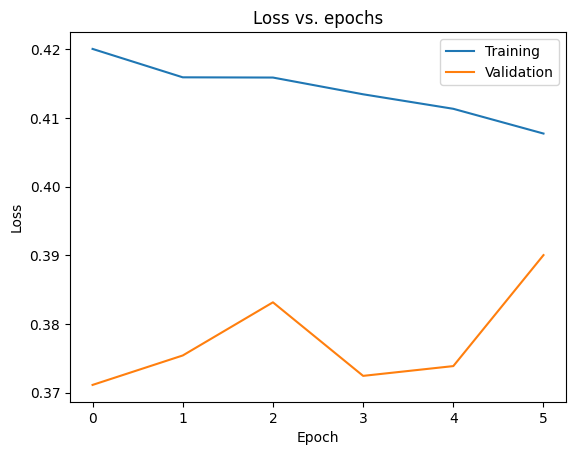

In [ ]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [ ]:
# Testing mode

test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4125 - sparse_categorical_accuracy: 0.8625
